In [1]:
import tensorflow as tf
import keras
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Flatten, Dense, Dropout, Activation, Permute
from keras.layers import Input
from keras.layers.normalization import BatchNormalization
from keras.models import Model, Sequential
from keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
X_test = np.load('/content/drive/My Drive/EEG_project/data/X_test.npy')
y_test = np.load('/content/drive/My Drive/EEG_project/data/y_test.npy')
person_train_valid = np.load('/content/drive/My Drive/EEG_project/data/person_train_valid.npy')
X_train_valid = np.load('/content/drive/My Drive/EEG_project/data/X_train_valid.npy')
y_train_valid = np.load('/content/drive/My Drive/EEG_project/data/y_train_valid.npy')
person_test = np.load('/content/drive/My Drive/EEG_project/data/person_test.npy')

In [4]:
print('Taining/Valid data shape: {}'.format(X_train_valid.shape))
print('Test data shape: {}'.format(X_test.shape))
print('Training/Valid target shape: {}'.format(y_train_valid.shape))
print('Test target shape: {}'.format(y_test.shape))
print('Person train/valid shape: {}'.format(person_train_valid.shape))
print('Person test shape: {}'.format(person_test.shape))

Taining/Valid data shape: (2115, 25, 1000)
Test data shape: (443, 25, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [5]:
X_train = np.zeros((2115, 22, 1000))
X_train = X_train_valid[:,:22,:]
X_train = np.expand_dims(X_train, 3)
print('Taining/Valid data shape: {}'.format(X_train.shape))
xtest = np.zeros((443, 22, 1000))
xtest = X_test[:,:22,:]
xtest = np.expand_dims(xtest, 3)
print('Test data shape: {}'.format(xtest.shape))
y_train = np.zeros((2115, 4))
y_train[y_train_valid==769, 0] = 1
y_train[y_train_valid==770, 1] = 1
y_train[y_train_valid==771, 2] = 1
y_train[y_train_valid==772, 3] = 1

Taining/Valid data shape: (2115, 22, 1000, 1)
Test data shape: (443, 22, 1000, 1)


In [0]:
def scnn_model():
  model = Sequential()
  
  init = keras.initializers.glorot_normal(seed = 0)
  
  model.add(Conv2D(filters = 40, input_shape = (22, 1000, 1), kernel_size = (1, 25), kernel_initializer = init))
  model.add(Conv2D(filters = 25, kernel_size = (22, 1), kernel_initializer = init))
  model.add(MaxPooling2D(pool_size = (1, 75)))
  model.add(Flatten())
  model.add(Dense(units = 4, kernel_initializer = init))
  model.add(Activation('softmax'))
  
  return model

In [7]:
model = scnn_model()
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.adam(lr = 0.001), metrics = ['accuracy'])
result = model.fit(X_train, y_train, batch_size = 16, validation_split = 0.2, epochs = 30)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1692 samples, validate on 423 samples
Epoch 1/30
1692/1692 [==============================] - 6s 4ms/step - loss: 2.3441 - acc: 0.2896 - val_loss: 1.7933 - val_acc: 0.3026
Epoch 2/30
1692/1692 [==============================] - 2s 1ms/step - loss: 1.6268 - acc: 0.3741 - val_loss: 1.7088 - val_acc: 0.2955
Epoch 3/30
1692/1692 [==============================] - 2s 1ms/step - loss: 1.4789 - acc: 0.3930 - val_loss: 1.7687 - val_acc: 0.3404
Epoch 4/30
1692/1692 [==============================] - 2s 1ms/step - loss: 1.3744 - acc: 0.4249 - val_loss: 1.5174 - val_acc: 0.4208
Epoch 5/30
1692/1692 [==============================] - 2s 1ms/step - loss: 1.3299 - acc: 0.4687 - val_loss: 1.8831 - val_acc: 0.3286
Epoch 6/30
1692/1692 [==============================] - 2s 1ms/step - loss: 1.2450 - acc: 0.4900 - val_loss: 1.4433 - val_acc: 0.4137
Epoch 7/30
1692/1692 [=======

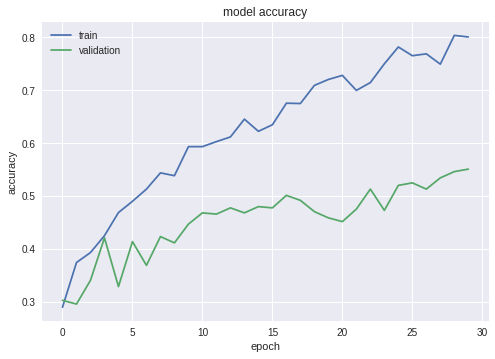

In [8]:
results = []
results.append(result.history['val_acc'])

plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [9]:
test_results = model.predict(x = xtest, batch_size = 16)
categ_results = np.argmax(test_results, axis = 1)
test_acc = np.sum(categ_results==y_test) / len(categ_results)
print('Training Accuracy: %.3f' % result.history['acc'][-1])
print('Validation Accuracy: %.3f' % result.history['val_acc'][-1])
print('Testing Accuracy: %.3f' % test_acc)

Training Accuracy: 0.801
Validation Accuracy: 0.551
Testing Accuracy: 0.000
